# Effects of Bike Rider's Characteristics on Their Rides Durations
## by (Mohd Tamimi)

## Investigation Overview

> In this investigation, I wanted to look at the characteristics of Bike Rider's such as age, gender, and type. and understand its effects on the rides duration in both week days and week ends.

## Dataset Overview

> The data consisted of rides durations and attributes of approximately 54,000 rides. The attributes included age, gender, and type of riders along with the time rides started and ended.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
bike = pd.read_csv('bike_clean')

In [3]:
# convert user_type, member_gender, day_type, and age_range into ordered categorical types
ordinal_var_dict = {'user_type': ['Subscriber','Customer'],
                    'member_gender': ['Male', 'Female', 'Other'],
                    'day_type': ['week_day', 'week_end'],
                    'age_range': ['young', 'middle', 'senior', 'unknown']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    bike[var] = bike[var].astype(ordered_var)

##  Distribution of Rides Durations

> Rides duration has a long-tailed distribution, When plotted on a log-scale, the duration distribution looks like a normal distribution with most of the rides having a duration of around 400 to 700 seconds

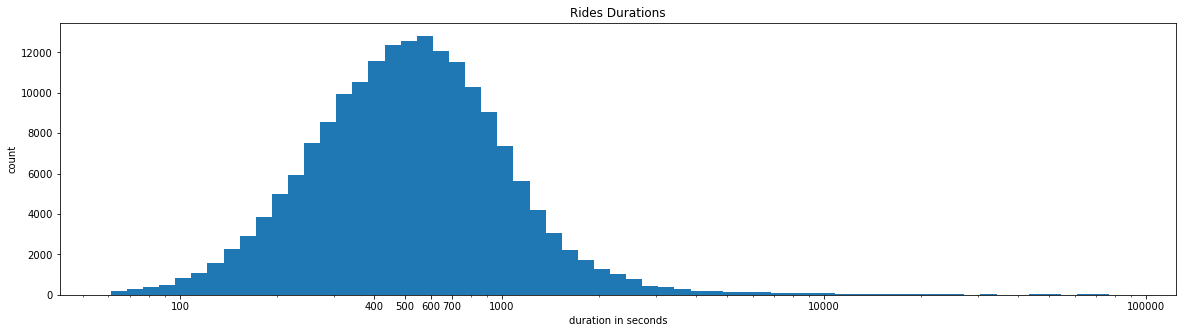

In [4]:
# there's a long tail in the distribution, so let's put it on a log scale instead
log_binsize = 0.05
bins = 10 ** np.arange(np.log10(bike['duration_sec'].min()), np.log10(bike['duration_sec'].max())+log_binsize, log_binsize)
ticks = [100,400,500,600,700,1000,10000,100000]
labels = [100,400,500,600,700,1000,10000,100000]
plt.figure(figsize=[20, 5])
plt.hist(data = bike, x = 'duration_sec', bins = bins)
plt.xscale('log')
plt.xticks(ticks, labels);
plt.xlabel('duration in seconds')
plt.ylabel('count')
plt.title('Rides Durations')
plt.show()

## Rides Durations By Gender

> females (23% of the riders) have slightly higher average ride duration (779 seconds) than males (75% of the riders with 762 seconds), although other have the top value of average rides duration (996 seconds) this is not reliable due to their very low sample size (2% of the riders)

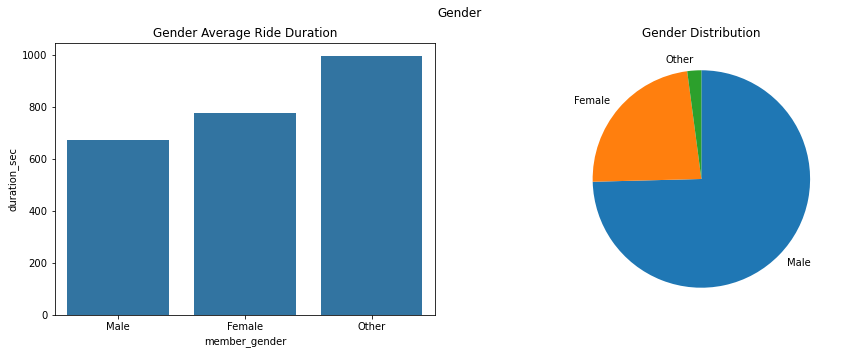

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=False, sharex=False)
fig.suptitle('Gender')
base_color = sb.color_palette()[0]
temp_group_by = bike.groupby('member_gender').duration_sec.mean()
duration_by_Gender = temp_group_by.reset_index()

sorted_counts = bike['member_gender'].value_counts()
plt.pie(sorted_counts,  labels = sorted_counts.index, startangle = 90, counterclock = False);
axes[1].set_title('Gender Distribution');


sb.barplot(ax=axes[0], x = duration_by_Gender['member_gender'],y = duration_by_Gender['duration_sec'], color =base_color );
axes[0].set_title('Gender Average Ride Duration');

## Rides Durations By Age Group

> close average ride duration for all age ranges (688, 710, 743) for the young, middle, & senior respectevily, the unknown age has the highest ride duration of 932 seconds.
riders distribution was: middle 57%, senior 2%, young 31%, unknown 10%

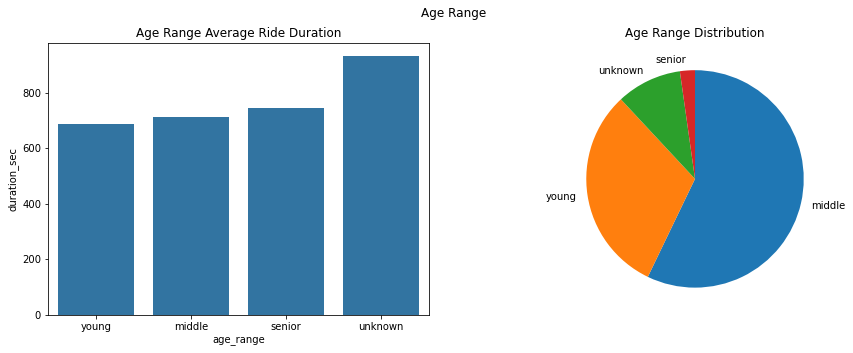

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=False, sharex=False)
fig.suptitle('Age Range')
base_color = sb.color_palette()[0]
temp_group_by = bike.groupby('age_range').duration_sec.mean()
duration_by_age = temp_group_by.reset_index()

sorted_counts = bike['age_range'].value_counts()
plt.pie(sorted_counts,  labels = sorted_counts.index, startangle = 90, counterclock = False);
axes[1].set_title('Age Range Distribution');

sb.barplot(ax=axes[0], x = duration_by_age['age_range'],y = duration_by_age['duration_sec'], color =base_color );
axes[0].set_title('Age Range Average Ride Duration');

## Rides Durations By Rider's Type
> Cutomers have much higher ride duration of 1432 seconds compared to 640 for subscribers, but this can be due to the much lower sample size of Customer (11% against subscriber 89%)


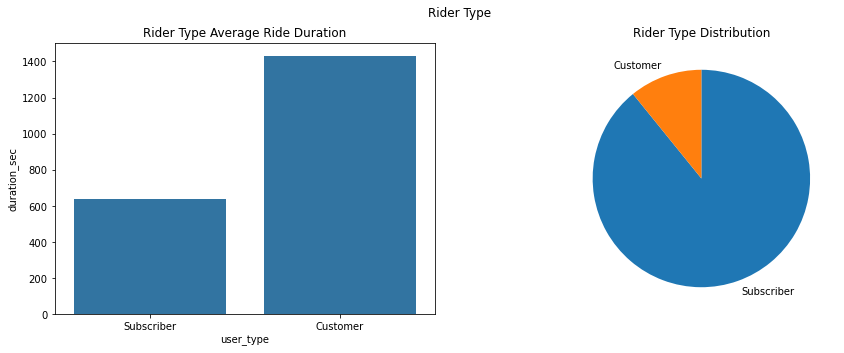

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=False, sharex=False)
fig.suptitle('Rider Type')
base_color = sb.color_palette()[0]
temp_group_by = bike.groupby('user_type').duration_sec.mean()
duration_by_rider = temp_group_by.reset_index()

sorted_counts = bike['user_type'].value_counts()
plt.pie(sorted_counts,  labels = sorted_counts.index, startangle = 90, counterclock = False);
axes[1].set_title('Rider Type Distribution');

sb.barplot(ax=axes[0], x = duration_by_rider['user_type'],y = duration_by_rider['duration_sec'], color =base_color );
axes[0].set_title('Rider Type Average Ride Duration');

## Rides Durations By Day of the week
> weekend rides are longer than weekdays rides (767 versus 712 seconds)

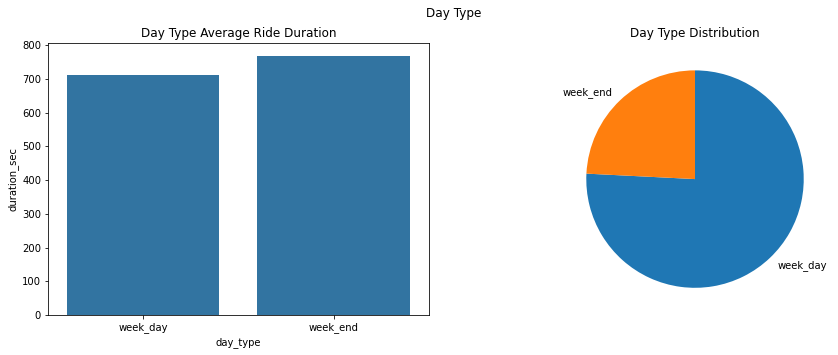

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=False, sharex=False)
fig.suptitle('Day Type')
base_color = sb.color_palette()[0]
temp_group_by = bike.groupby('day_type').duration_sec.mean()
duration_by_day = temp_group_by.reset_index()

sorted_counts = bike['day_type'].value_counts()
plt.pie(sorted_counts,  labels = sorted_counts.index, startangle = 90, counterclock = False);
axes[1].set_title('Day Type Distribution');

sb.barplot(ax=axes[0], x = duration_by_day['day_type'],y = duration_by_day['duration_sec'], color =base_color );
axes[0].set_title('Day Type Average Ride Duration');